In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import matplotlib as mpl
from matplotlib.patches import Patch
import plotly.express as px

In [9]:
data_236 = pd.read_csv('./Data/NA236.csv')
data_236.set_index('PSNO_NA_ECP', inplace=True)
data_236 = data_236.sort_index()
yellow = '#FFC300'
blue = '#00b0be' 
pink = '#f45f74' 
orange = '#FF5F1F'
light_blue = '#8fd7d7'
light_pink = '#ff8ca1'

## **Graph 1**
Number of Polling Stations won by each candidate in General Elections 2024 in NA-236 (Based on ECP Form-45s)

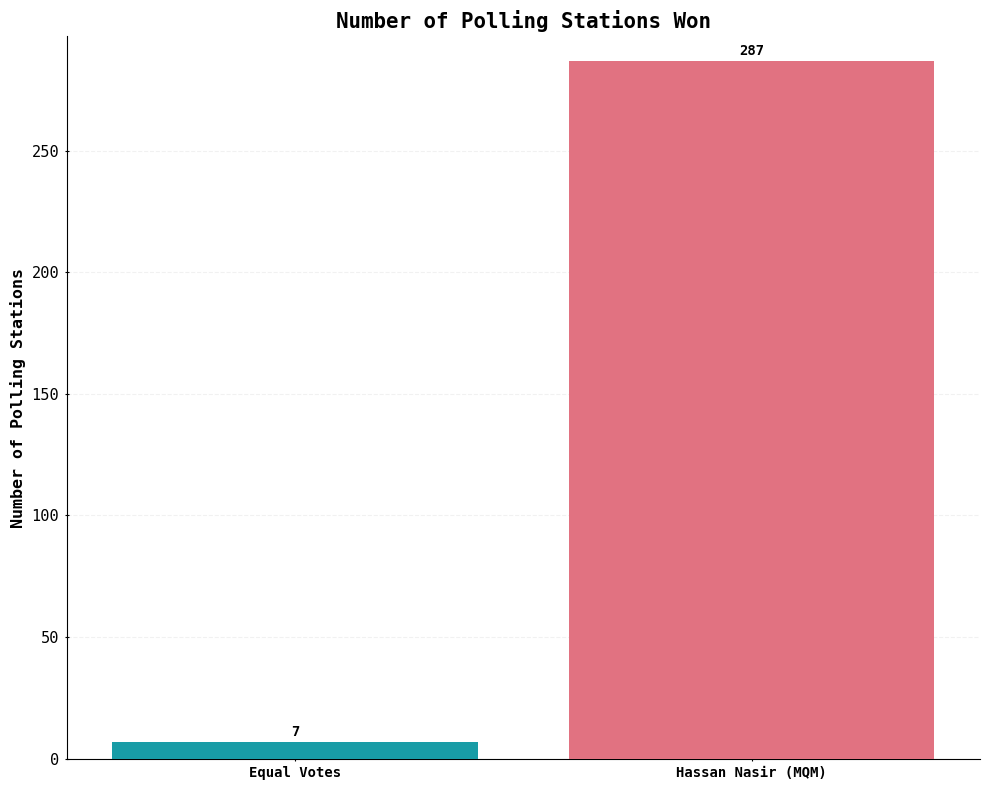

In [10]:
font_family = 'monospace'
sns.set_style({
    'axes.facecolor': 'none',
    'grid.color': 'lightgrey',
    'axes.edgecolor': 'black',
    'xtick.direction': 'inout',
    'ytick.direction': 'inout',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.bottom': True,
    'ytick.left': True,
    'font.family': font_family,
    'font.size': 12
})

data_236_ECP_Winner = data_236['WINNER_ECP'].value_counts().sort_index()
colors = [blue if i % 2 == 0 else pink for i in range(len(data_236_ECP_Winner))]

plt.figure(figsize=(10, 8))
ax = plt.gca()

bars = sns.barplot(
    x=data_236_ECP_Winner.index,
    y=data_236_ECP_Winner.values,
    hue=data_236_ECP_Winner.index,
    legend=False,
    palette=colors,
    zorder=5
)

for bar in bars.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{int(height)}',
        ha='center',
        va='bottom',
        color='black',
        fontsize=10,
        fontweight='semibold'
    )
plt.title('Number of Polling Stations Won', fontsize=15, fontweight='bold', color='black')
plt.xlabel('', fontsize=14, fontweight='bold')
plt.ylabel('Number of Polling Stations', fontsize=12, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylim(0, max(data_236_ECP_Winner.values) + 10)
plt.xticks(rotation=0, fontsize=10, fontweight='semibold', ha='center')
plt.yticks(fontsize=11)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
# plt.text(
#     0.5, -0.15,
#     'Figure 1: Distribution of polling stations won by each candidate in NA-236 based on ECP Form-45 data. PTI’s Muhammad Haris led in 215 stations,\n'
#     'whereas MQM’s Muhammad Javaid Hanif secured just 72. This stark contrast raises questions about the final outcome, suggesting that MQM’s success\n'
#     'may have hinged on a smaller number of high-turnout stations. The data points toward a potential imbalance in vote distribution.\n(Source: ECP Form-45s)',
#     fontsize=10,
#     ha='center',
#     va='center',
#     wrap=False,
#     transform=plt.gca().transAxes
# )
plt.tight_layout()
plt.savefig('./Graphs/Figure_1.png', dpi=600, bbox_inches='tight')
plt.show()

## **Graph 2**
Number of Votes received by each candidate in General Elections 2024 in NA-236 (Based on ECP Form-45s)


/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_3894/3583293096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_236_votes_ecp['OPP_VOTES_ECP'] = pd.to_numeric(data_236_votes_ecp['OPP_VOTES_ECP'], errors='coerce')
/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_3894/3583293096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_236_votes_ecp['PTI_VOTES_ECP'] = pd.to_numeric(data_236_votes_ecp['PTI_VOTES_ECP'], errors='coerce')


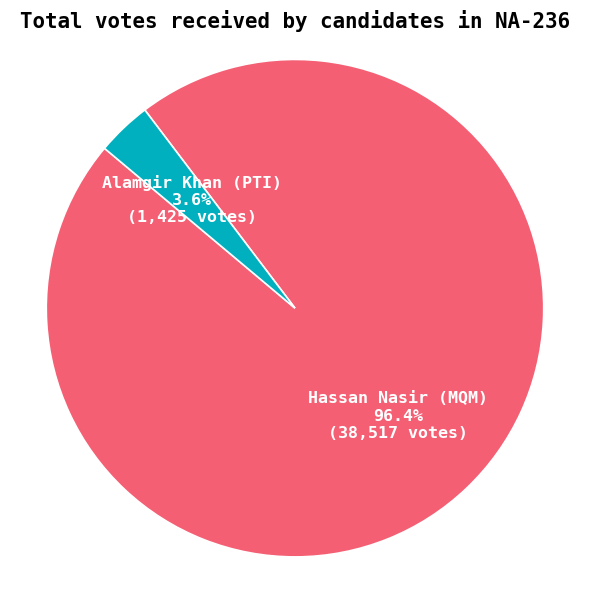

In [11]:
data_236_votes_ecp = data_236[['OPP_VOTES_ECP', 'PTI_VOTES_ECP']]
data_236_votes_ecp['OPP_VOTES_ECP'] = pd.to_numeric(data_236_votes_ecp['OPP_VOTES_ECP'], errors='coerce')
data_236_votes_ecp['PTI_VOTES_ECP'] = pd.to_numeric(data_236_votes_ecp['PTI_VOTES_ECP'], errors='coerce')
data_236_votes_ecp = data_236_votes_ecp.sum()
data_236_votes_ecp.index = ['Hassan Nasir (MQM)', 'Alamgir Khan (PTI)']
candidate_colors = {
    'Hassan Nasir (MQM)': pink,
    'Alamgir Khan (PTI)': blue
}
colors = [candidate_colors[name] for name in data_236_votes_ecp.index]
labels = data_236_votes_ecp.index
values = data_236_votes_ecp.values
def make_autopct(labels, values):
    def my_autopct(pct):
        val = int(round(pct * sum(values) / 100.0))
        label = labels[my_autopct.i]
        my_autopct.i += 1
        return f'{label}\n{pct:.1f}%\n({val:,} votes)'
    my_autopct.i = 0
    return my_autopct
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    values,
    labels=None,
    autopct=make_autopct(labels, values),
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.2},
    textprops={'fontsize': 12, 'weight': 'bold', 'color': 'white'}
)
plt.title('Total votes received by candidates in NA-236', fontsize=15, fontweight='bold', color='black')
plt.axis('equal') 
# plt.text(
#     0.5, -0.1,
#     'Figure 2: Vote totals in NA-236 based on ECP Form-45 data. Although Muhammad Javaid Hanif of MQM won in fewer polling stations, he received 105,476 votes (64.5%),\n'
#     'compared to 58,015 votes (35.5%) for PTI’s Muhammad Haris. This substantial lead of 47,461 votes suggests MQM’s wins came from stations with disproportionately\n'
#     'high turnout. Such a pattern, especially if turnout rates are unusually high, may indicate irregularities and warrants closer scrutiny of station-level data.\n(Source: ECP Form-45s)',
#     wrap=False,
#     fontsize=10,
#     ha='center',
#     va='center',
#     transform=plt.gca().transAxes
# )
plt.tight_layout()
plt.savefig('./Graphs/Figure_2.png', dpi=600, bbox_inches='tight')
plt.show()

## **Graph 3**
Distribution of Turnout percentages in General Elections 2024 in NA-236 (Based on ECP Form-45s) NA

/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_3894/3367586890.py:25: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_3894/3367586890.py:25: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.05`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  ax = sns.violinplot(


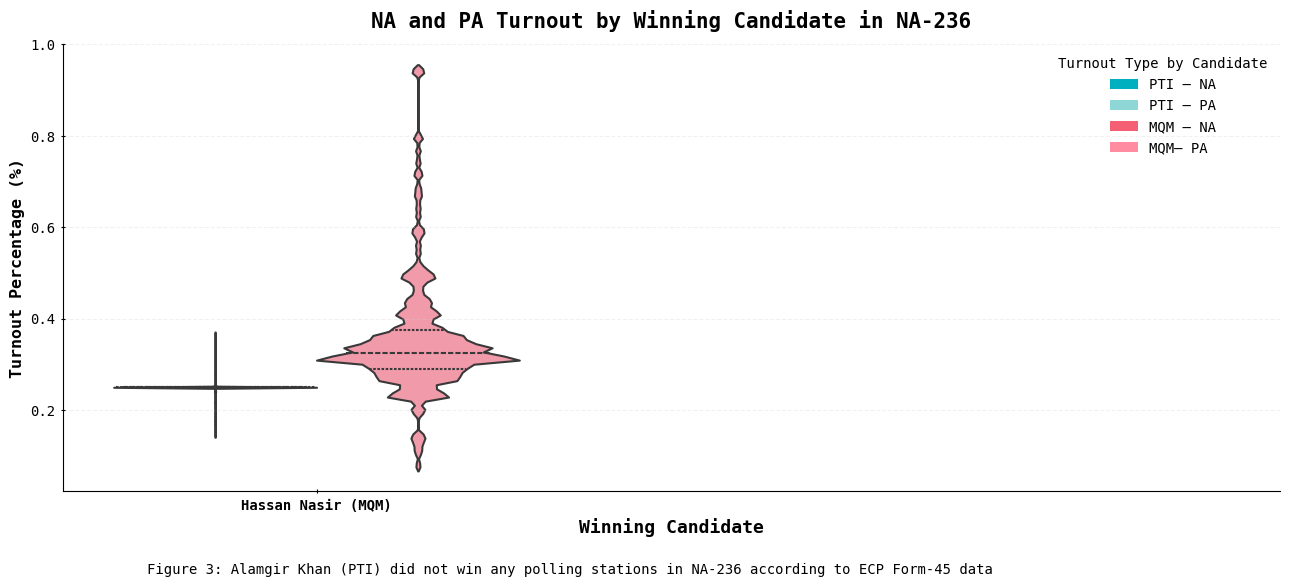

In [16]:
df_long = data_236[['WINNER_ECP', 'TURNOUT_NA_PERCENTAGE_ECP', 'TURNOUT_PA_PERCENTAGE_ECP']].copy()
df_long['TURNOUT_NA_PERCENTAGE_ECP'] = pd.to_numeric(df_long['TURNOUT_NA_PERCENTAGE_ECP'], errors='coerce')
df_long['TURNOUT_PA_PERCENTAGE_ECP'] = pd.to_numeric(df_long['TURNOUT_PA_PERCENTAGE_ECP'], errors='coerce')
df_long['WINNER_ECP'] = df_long['WINNER_ECP'].replace({
    'Equal Votes' : np.nan
})
df_long = df_long.dropna(subset=['WINNER_ECP', 'TURNOUT_NA_PERCENTAGE_ECP', 'TURNOUT_PA_PERCENTAGE_ECP'])
df_long = df_long.melt(
    id_vars='WINNER_ECP',
    value_vars=['TURNOUT_NA_PERCENTAGE_ECP', 'TURNOUT_PA_PERCENTAGE_ECP'],
    var_name='Turnout Type',
    value_name='Turnout Percentage'
    )
df_long['Turnout Type'] = df_long['Turnout Type'].str.replace('TURNOUT_', '').str.replace('_PERCENTAGE_ECP', '')
df_long['Turnout Percentage'] = df_long['Turnout Percentage'].astype(float)

palette = {
    ('Alamgir Khan (PTI)', 'NA'): blue,
    ('Alamgir Khan (PTI)', 'PA'): light_blue,
    ('Hassan Nasir (MQM)', 'NA'): pink,
    ('Hassan Nasir (MQM)', 'PA'): light_pink
}
df_long['Hue Group'] = list(zip(df_long['WINNER_ECP'], df_long['Turnout Type']))
plt.figure(figsize=(13, 6))
ax = sns.violinplot(
    x='WINNER_ECP',
    y='Turnout Percentage',
    hue='Hue Group',
    data=df_long,
    palette=palette,
    inner='quartile',
    linewidth=1.5,
    scale='width',
    bw=0.05,
    dodge=True
)

plt.xlabel('Winning Candidate', fontsize=13, fontweight='bold')
plt.ylabel('Turnout Percentage (%)', fontsize=12, fontweight='bold')
plt.title('NA and PA Turnout by Winning Candidate in NA-236', fontsize=15, fontweight='bold', pad=12)
plt.xticks(fontsize=10, fontweight='semibold')
plt.yticks(fontsize=10)
plt.xlim(-0.5, 1.9)
ax.grid(axis='y', linestyle='--', alpha=0.3)

legend_elements = [
    Patch(facecolor=blue, label='PTI – NA'),
    Patch(facecolor=light_blue, label='PTI – PA'),
    Patch(facecolor=pink, label='MQM – NA'),
    Patch(facecolor=light_pink, label='MQM– PA')
]
ax.legend(handles=legend_elements, title='Turnout Type by Candidate', loc='upper right', frameon=False)
plt.text(
    0.5, -0.15,
    'Figure 3: Alamgir Khan (PTI) did not win any polling stations in NA-236 according to ECP Form-45 data',
    fontsize=10,
    ha='center',
    va='center',
    wrap=False,
)
plt.tight_layout()
plt.savefig('./Graphs/Figure_3.png', dpi=600, bbox_inches='tight')
plt.show()


## **Graph 4**
Number of polling stations won by each candidate in General Elections 2024 in NA-236 (Based on ECP Form-45s) where turnout difference between NA and PA was more than 50 votes

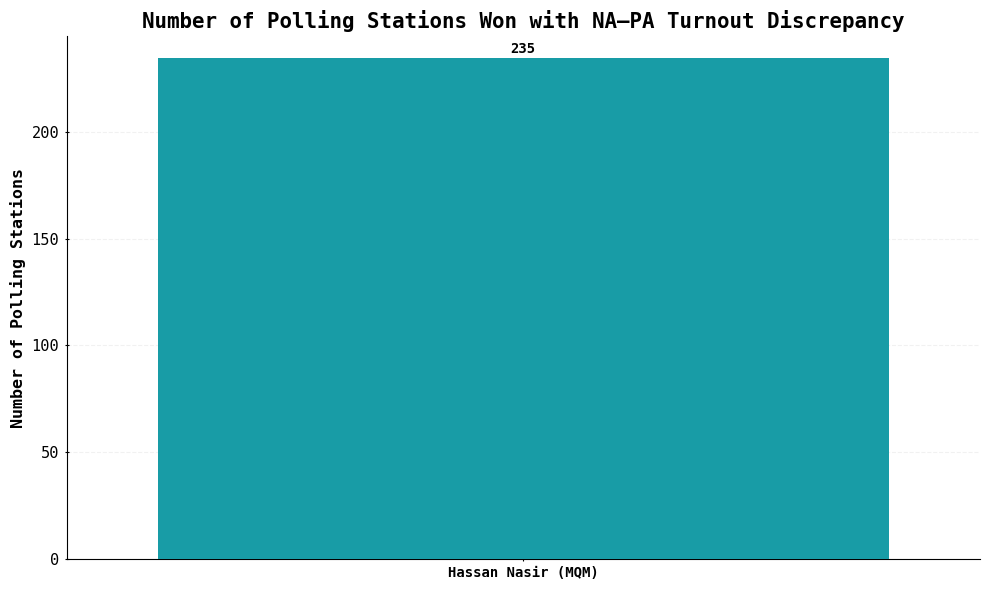

In [ ]:
data_236_Discrepency = data_236[['TURNOUT_DIFFERENCE', 'WINNER_ECP']].copy()
data_236_Discrepency['TURNOUT_DIFFERENCE'] = pd.to_numeric(data_236_Discrepency['TURNOUT_DIFFERENCE'], errors='coerce')
data_236_Discrepency['WINNER_ECP'] = data_236_Discrepency['WINNER_ECP'].replace({
    'Equal Votes' : np.nan
})
data_236_Discrepency = data_236_Discrepency.dropna(subset=['WINNER_ECP', 'TURNOUT_DIFFERENCE'])
data_236_Discrepency = data_236_Discrepency[abs(data_236_Discrepency['TURNOUT_DIFFERENCE']) >= 50]

data_236_ECP_Winner_discrepency = data_236_Discrepency['WINNER_ECP'].value_counts().sort_index()
colors = [blue if i % 2 == 0 else pink for i in range(len(data_236_ECP_Winner_discrepency))]

plt.figure(figsize=(10, 6))
ax = plt.gca()

bars = sns.barplot(
    x=data_236_ECP_Winner_discrepency.index,
    y=data_236_ECP_Winner_discrepency.values,
    hue=data_236_ECP_Winner_discrepency.index,
    
    palette=colors,
    zorder=5
)

for bar in bars.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{int(height)}',
        ha='center',
        va='bottom',
        color='black',
        fontsize=10,
        fontweight='semibold'
    )
plt.title('Number of Polling Stations Won with NA–PA Turnout Discrepancy', fontsize=15, fontweight='bold', color='black')
plt.xlabel('', fontsize=14, fontweight='bold')
plt.ylabel('Number of Polling Stations', fontsize=12, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylim(0, max(data_236_ECP_Winner_discrepency.values) + 10)
plt.xticks(rotation=0, fontsize=10, fontweight='semibold')
plt.yticks(fontsize=11)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.tight_layout()
plt.savefig('./Graphs/Figure_4.png', dpi=600, bbox_inches='tight')
plt.show()

## **Graph 5**
This shows the distribution of absolute turnout differences between NA and PA polling stations in General Elections 2024 in NA-236 (Based on ECP Form-45s)

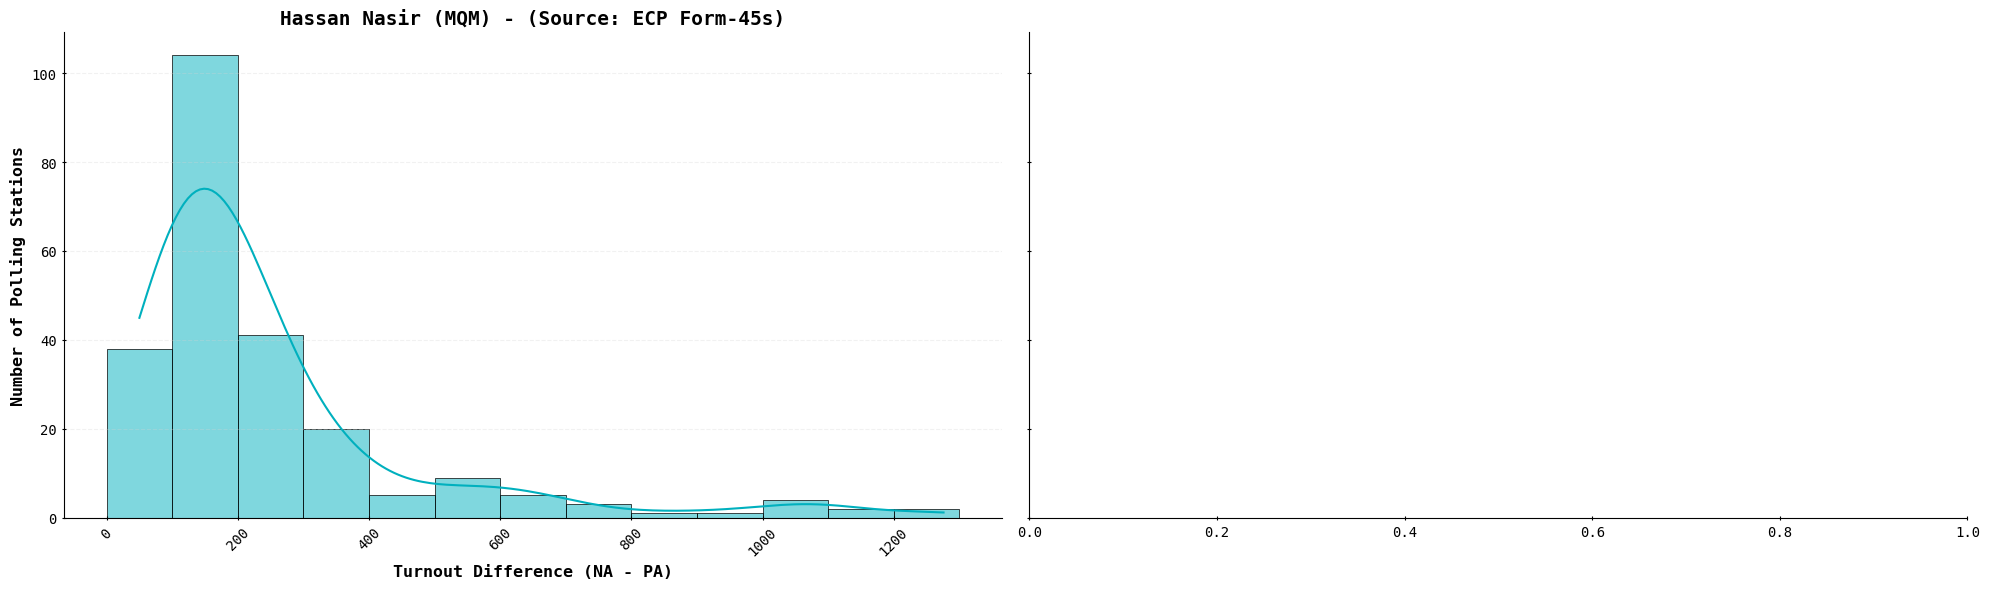

In [20]:
data_236_discrepency = data_236[['WINNER_ECP','TURNOUT_DIFFERENCE']].copy()
data_236_discrepency['TURNOUT_DIFFERENCE'] = pd.to_numeric(data_236_discrepency['TURNOUT_DIFFERENCE'], errors='coerce')
data_236_discrepency['WINNER_ECP'] = data_236_discrepency['WINNER_ECP'].replace({
    'Equal Votes' : np.nan
})
data_236_discrepency = data_236_discrepency.dropna(subset=['WINNER_ECP', 'TURNOUT_DIFFERENCE'])
data_236_discrepency = data_236_discrepency[abs(data_236_discrepency['TURNOUT_DIFFERENCE']) >= 50]

min_diff = (data_236_discrepency['TURNOUT_DIFFERENCE'].min() // 100) * 100
max_diff = (data_236_discrepency['TURNOUT_DIFFERENCE'].max() // 100 + 1) * 100
bin_edges = np.arange(min_diff, max_diff + 100, 100)

candidates = data_236_discrepency['WINNER_ECP'].unique()
candidate_data = {candidate: data_236_discrepency[data_236_discrepency['WINNER_ECP'] == candidate] for candidate in candidates}

fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

colors = [blue, pink] 
for i, (candidate, subset) in enumerate(sorted(candidate_data.items())):
    sns.histplot(
        data=subset,
        x='TURNOUT_DIFFERENCE',
        bins=bin_edges,
        kde=True,
        color=colors[i % len(colors)],
        edgecolor='black',
        linewidth=0.5,
        ax=axes[i]
    )
    axes[i].set_title(f'{candidate} - (Source: ECP Form-45s)', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Turnout Difference (NA - PA)', fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', labelrotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)

axes[0].set_ylabel('Number of Polling Stations', fontsize=12, fontweight='bold')

# plt.text(
#     0.5, -0.3,
#     'Figure 5: This histogram visualizes the distribution of turnout differences between National Assembly (NA) and Provincial Assembly (PA) votes across polling stations\n'
#     'in NA-236. Most differences cluster between 600 to 1400 votes, with a sharp spike around the 1200 mark. One case exceeds 2000 votes. Such a concentrated \n'
#     'pattern of high NA–PA turnout gaps—absent a proportional rise in PA turnout—raises serious questions about the integrity of NA vote counts at these stations.\n'
#     '(Source: ECP Form-45s) — (Note: Polling stations with differences below 50 votes are excluded)',
#     fontsize=10,
#     ha='center',
#     va='center',
#     transform=plt.gca().transAxes,
#     wrap=False
# )
plt.tight_layout()
plt.savefig('./Graphs/Figure_5.png', dpi=600, bbox_inches='tight')
plt.show()